In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [4]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.Location.unique() #List of locations

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
df.columns #Labels of each columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
melb = df[df["Location"]=="Melbourne"] #Selecting the location
melb["Date"] = pd.to_datetime(melb['Date']) #converting the date column into a datetime type
melb.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Edgar\AppData\Local\Temp\ipykernel_19332\1149526031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb["Date"] = pd.to_datetime(melb['Date']) #converting the date column into a datetime type



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [9]:
melb.dtypes #The date column is in datetime type

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

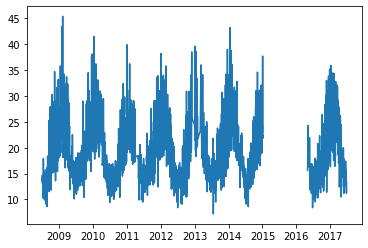

In [10]:
plt.plot(melb["Date"], melb["Temp3pm"]) #looking over data
plt.show()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Edgar\AppData\Local\Temp\ipykernel_19332\1471274350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb["Year"] = melb["Date"].apply(lambda x: x.year) #looping through the years and extracting the year



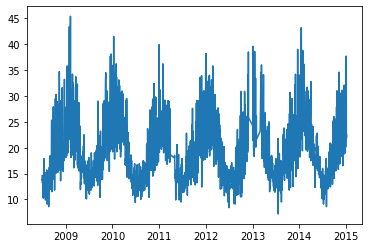

In [11]:
melb["Year"] = melb["Date"].apply(lambda x: x.year) #looping through the years and extracting the year
melb = melb[melb["Year"] <= 2015] #cutting out the missing data
plt.plot(melb["Date"], melb["Temp3pm"])
plt.show()

In [12]:
melb.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [13]:
data = melb[["Date", "Temp3pm"]] #Neural can only be done with only 2 columns, so grabbing data that important
data.dropna(inplace = True) #this will drop all of the NA
data.columns = ["ds", "y"] 
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Edgar\AppData\Local\Temp\ipykernel_19332\149216864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True) #this will drop all of the NA



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


Training the Model

In [14]:
m = NeuralProphet() #importing
m.fit(data, freq="D", epochs=1000) #1st parameter is grabbing the new data, 2nd the data is in daily frequency, that is why its in "D", 3rd the amount of times being trained  

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
 93%|█████████▎| 250/268 [00:00<00:00, 263.86it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.28E-02, min: 1.11E+00
 92%|█████████▏| 246/268 [00:00<00:00, 262.96it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.37E-02, min: 1.11E+00
 92%|█████████▏| 247/268 [00:00<00:00, 265.52it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.81E-02, min: 1.20E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.81E-02
Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:27<00:00, 11.44it/s, SmoothL1Loss=0.0144, MAE=3.02, RMSE=3.92, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.721809,26.615997,32.336047,0.0
1,0.656311,24.921031,30.288006,0.0
2,0.594550,23.313841,28.402133,0.0
3,0.535130,21.758134,26.482591,0.0
4,0.478511,20.242371,24.619606,0.0
...,...,...,...,...
995,0.014441,3.016779,3.918465,0.0
996,0.014441,3.016708,3.913805,0.0
997,0.014440,3.016686,3.938028,0.0
998,0.014440,3.016692,3.906629,0.0


Forecasting

In [15]:
future = m.make_future_dataframe(data, periods=1200) #this will output 1200 dates into the future
forecast = m.predict(future)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Edgar\AppData\Local\Programs\Python\Python39\lib\site-packages\neuralprophet\forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.178062,NaN,20.689045,5.266587,0.222430
1,2015-01-07,None,26.097412,NaN,20.692215,5.414152,-0.008957
2,2015-01-08,None,26.393036,NaN,20.695385,5.558765,0.138886
3,2015-01-09,None,26.467461,NaN,20.698555,5.699647,0.069257
4,2015-01-10,None,26.519730,NaN,20.701725,5.836041,-0.018038


In [16]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1195,2018-04-15,None,24.893650,NaN,24.477482,0.480039,-0.063870
1196,2018-04-16,None,24.460663,NaN,24.480652,0.319719,-0.339709
1197,2018-04-17,None,24.867794,NaN,24.483822,0.161543,0.222430
1198,2018-04-18,None,24.483902,NaN,24.486992,0.005869,-0.008957
1199,2018-04-19,None,24.482071,NaN,24.490162,-0.146976,0.138886


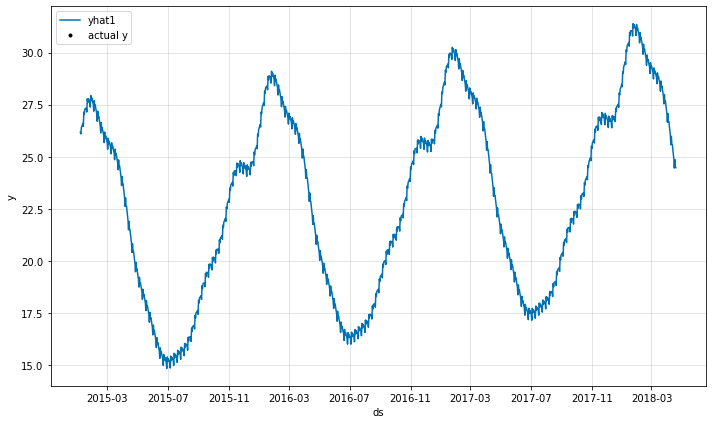

In [17]:
plot = m.plot(forecast)

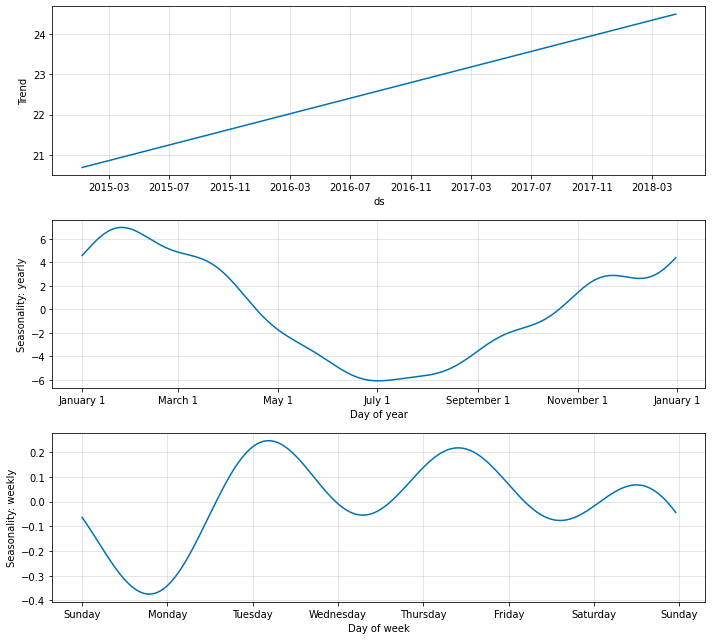

In [18]:
plot2 = m.plot_components(forecast)

In [19]:
with open ("forecast_model.pkl", "wb") as f:
    pickle.dump(m,f)

In [20]:
m

In [21]:
with open ("forecast_model.pkl", "rb") as f:
    m = pickle.load(f)

In [22]:
m

In [23]:
future = m.make_future_dataframe(data, periods=1000) #this will output 1200 dates into the future
forecast = m.predict(future)
forecast.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Edgar\AppData\Local\Programs\Python\Python39\lib\site-packages\neuralprophet\forecaster.py:395: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.178062,NaN,20.689045,5.266587,0.222430
1,2015-01-07,None,26.097412,NaN,20.692215,5.414152,-0.008957
2,2015-01-08,None,26.393036,NaN,20.695385,5.558765,0.138886
3,2015-01-09,None,26.467461,NaN,20.698555,5.699647,0.069257
4,2015-01-10,None,26.519730,NaN,20.701725,5.836041,-0.018038


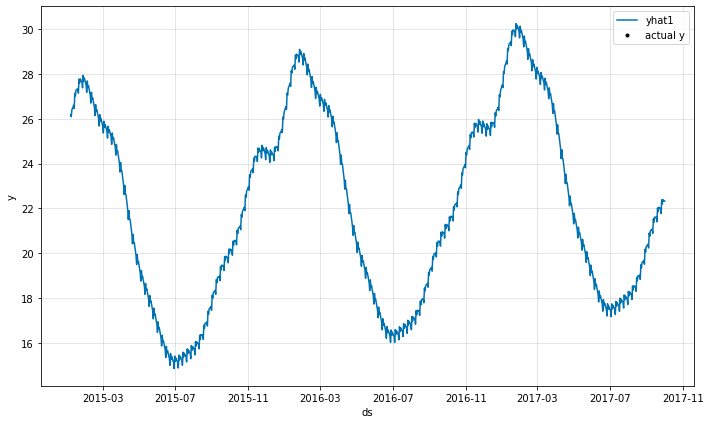

In [24]:
plot = m.plot(forecast)